In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv("Comcast_telecom_complaints_data.csv")

In [8]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes


In [10]:
df["date_index"] = df["Date_month_year"] + " " + df["Time"] 

In [11]:
df["date_index"] = pd.to_datetime(df["date_index"])
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])

In [12]:
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

In [13]:
df = df.set_index(df["date_index"])

In [14]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47


In [15]:
df["Date_month_year"].value_counts()[:3]

2015-06-24    218
2015-06-23    190
2015-06-25     98
Name: Date_month_year, dtype: int64

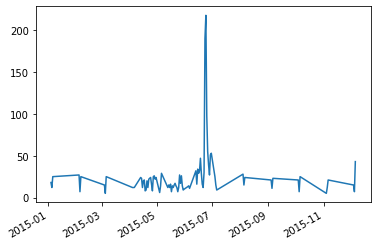

In [16]:
df["Date_month_year"].value_counts().plot();

In [17]:
f = df.groupby(pd.Grouper(freq="M")).size()

In [18]:
f.head()

date_index
2015-01-31     55
2015-02-28     59
2015-03-31     45
2015-04-30    375
2015-05-31    317
Freq: M, dtype: int64

<AxesSubplot:xlabel='date_index'>

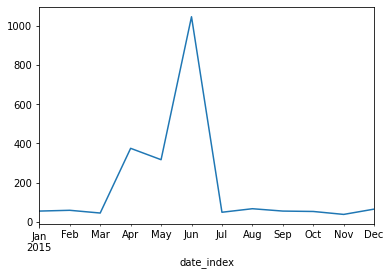

In [19]:
df.groupby(pd.Grouper(freq="M")).size().plot()

In [20]:
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [21]:
df["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]

In [22]:
df.head(3)


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,newStatus
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed


In [23]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)[:5]

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


In [24]:
Status_complaints = df.groupby(["State","newStatus"]).size().unstack().fillna(0)
Status_complaints

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


<AxesSubplot:ylabel='State'>

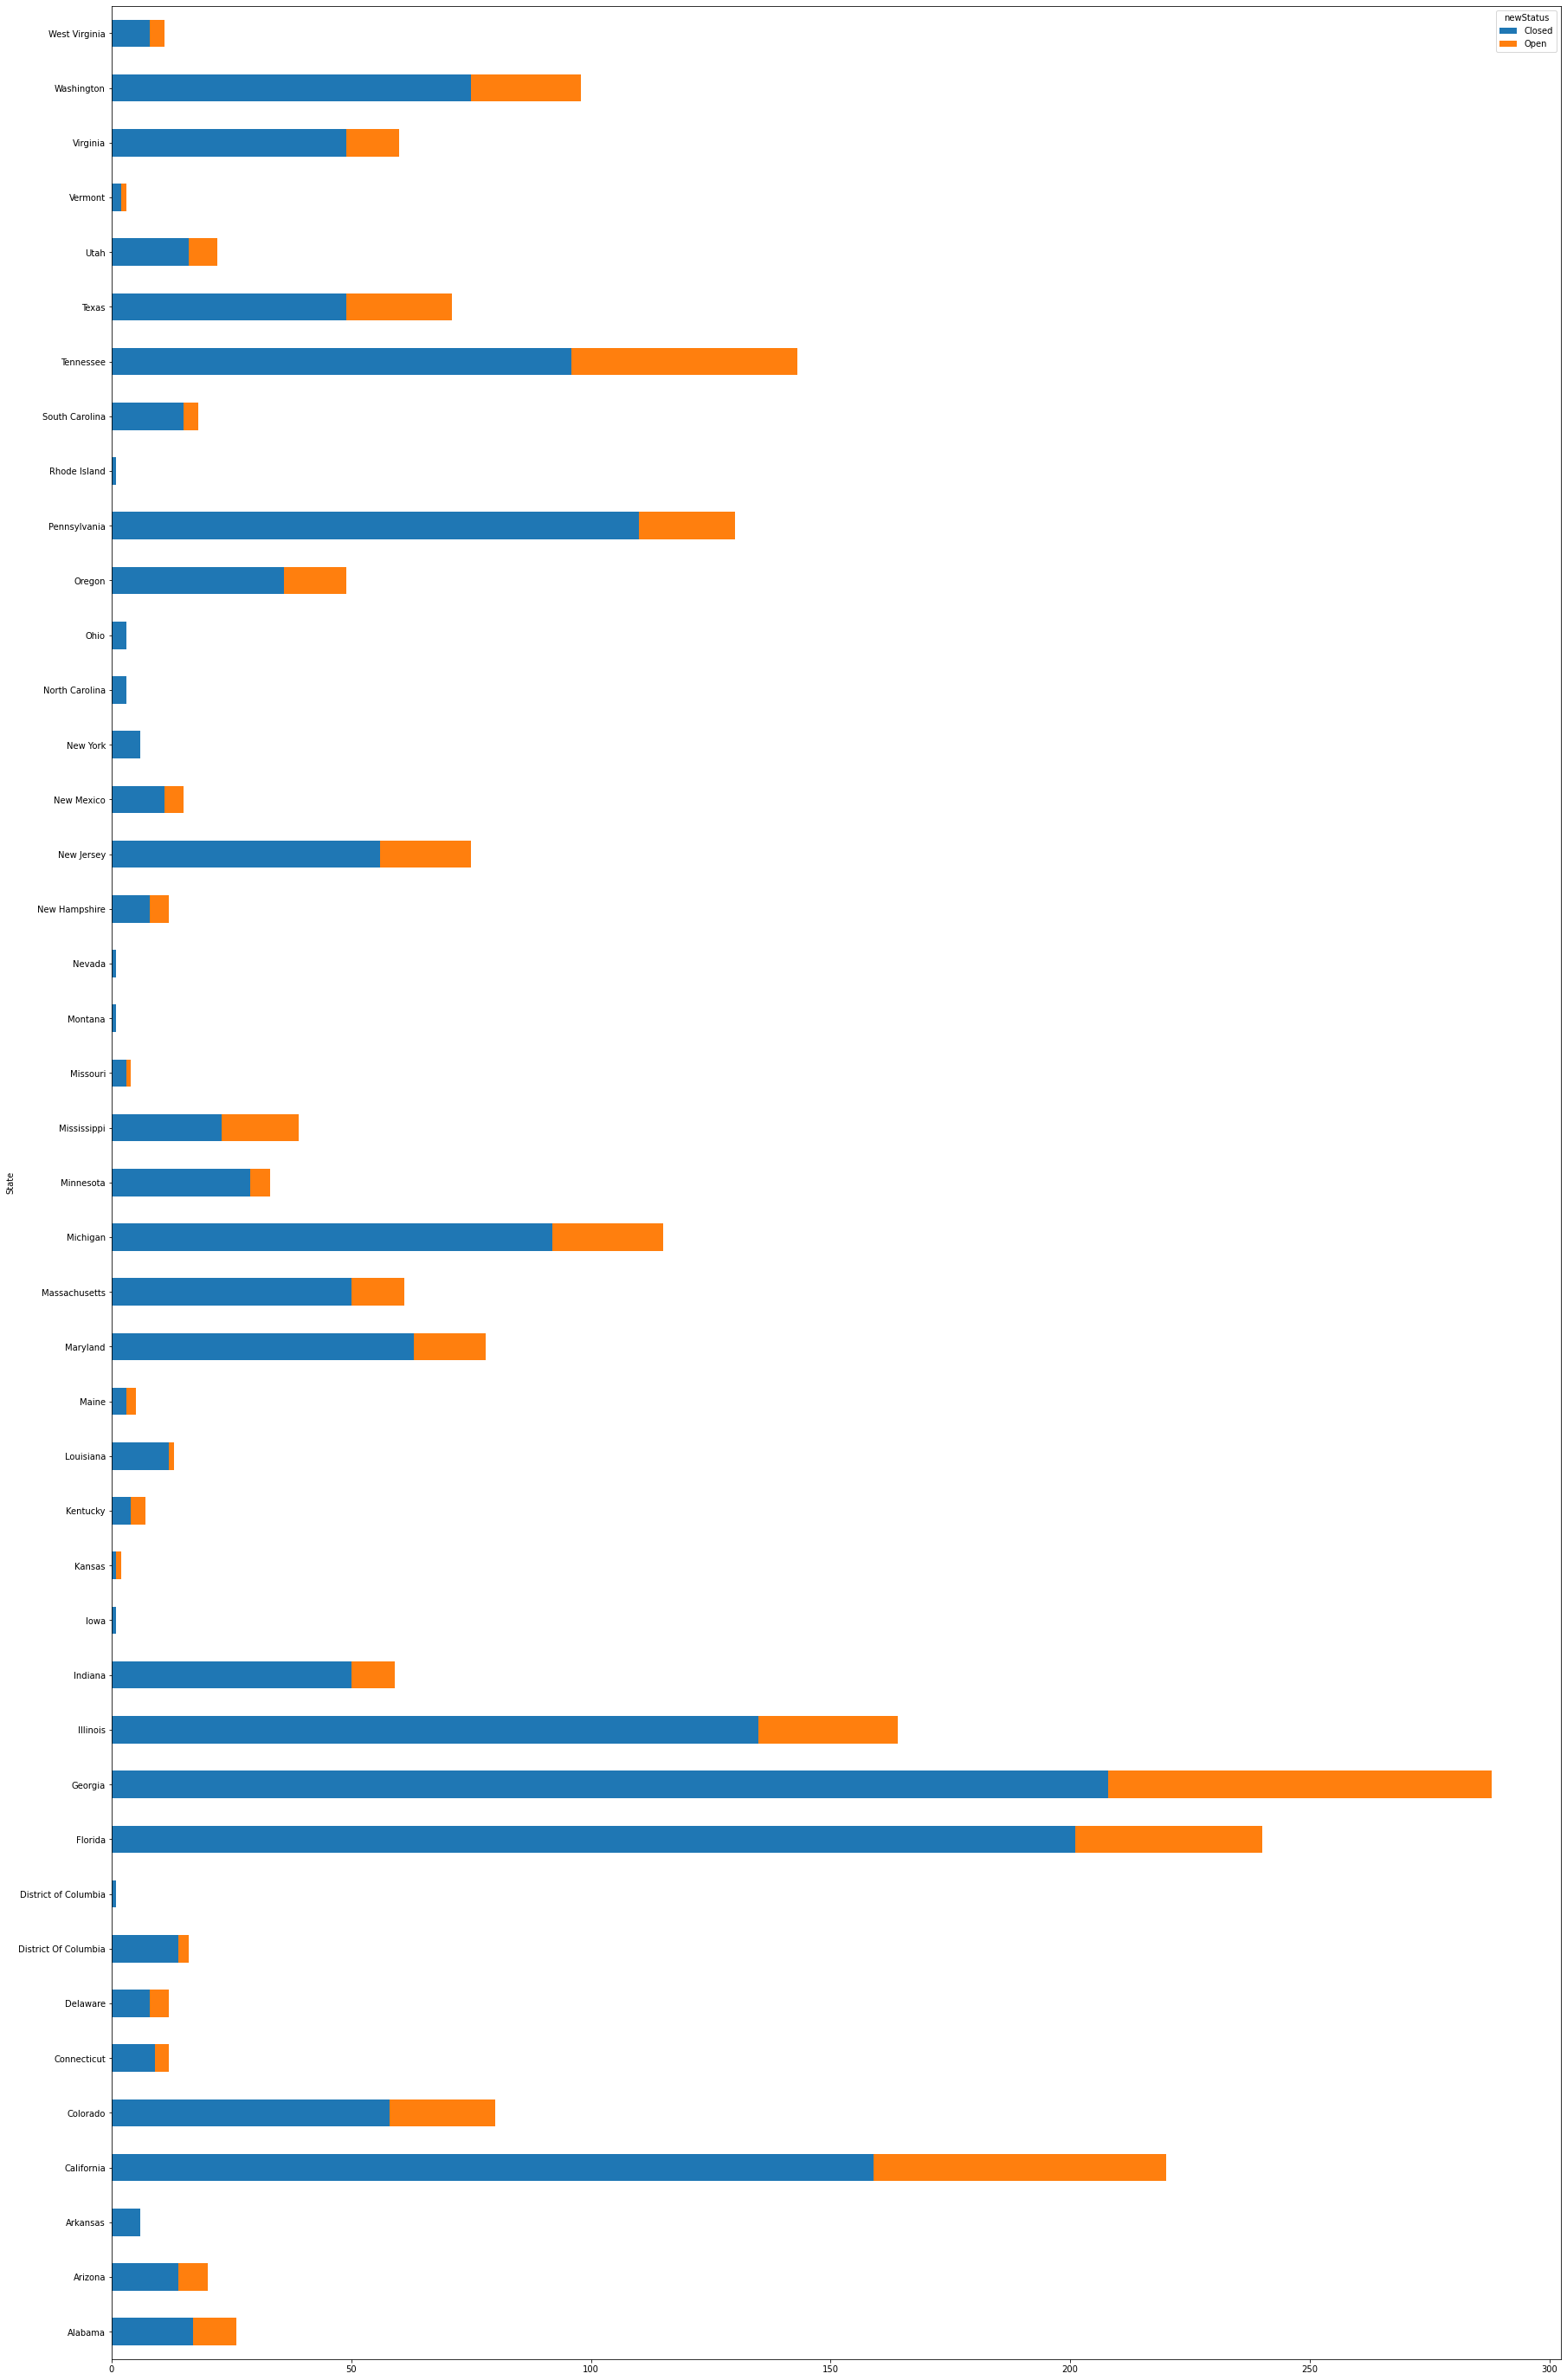

In [25]:
Status_complaints.plot(kind="barh", figsize=(30,50), stacked=True)

In [26]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1).max()

State    West Virginia
Count              288
dtype: object

In [27]:
df.groupby(["State","newStatus"]).size().unstack().fillna(0).max()

newStatus
Closed    208.0
Open       80.0
dtype: float64